In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [66]:
df=pd.read_excel('premiums_young_with_gr.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


### Modyfying Column Names

In [67]:
df.columns=df.columns.str.replace(' ',"_").str.lower()

In [68]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


### Handling NA Values

In [69]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [72]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [73]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [74]:
df[df.number_of_dependants<0].shape
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [75]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

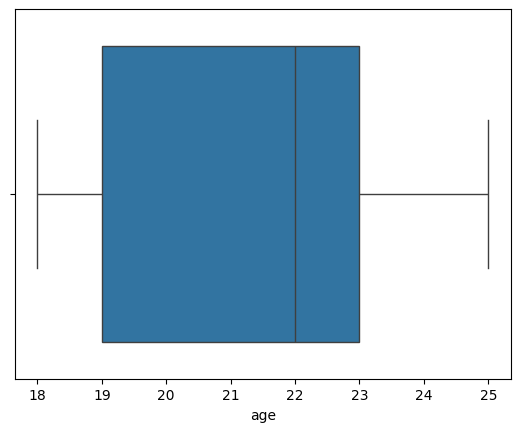

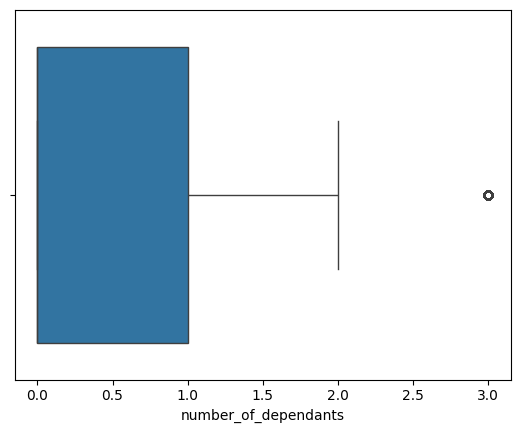

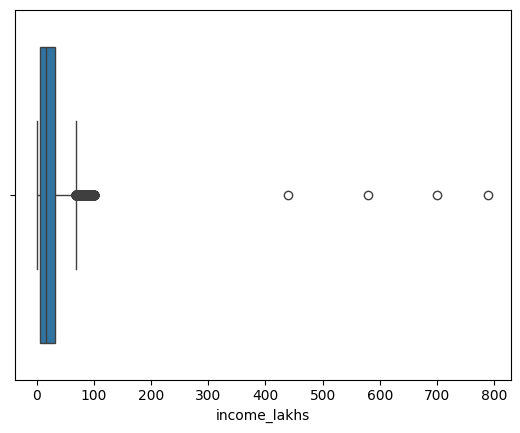

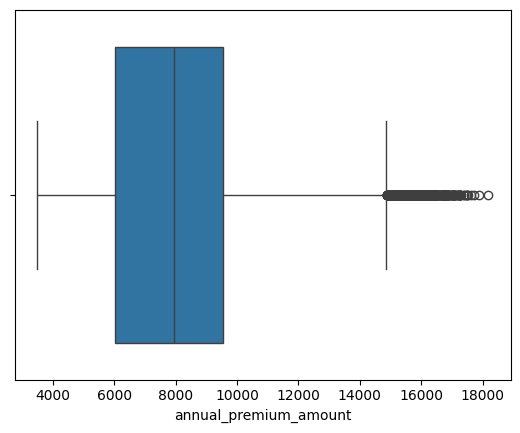

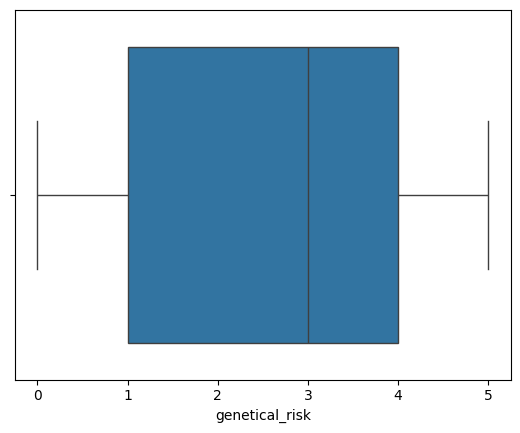

In [76]:
numerix_columns=df.select_dtypes(['float64','int64']).columns
for col in numerix_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [77]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [78]:
df1=df[df.age<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

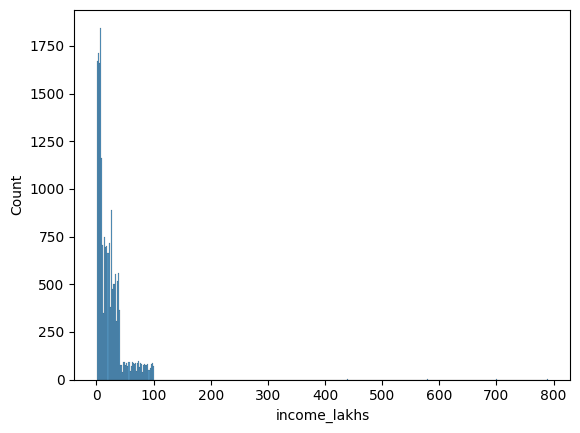

In [79]:
sns.histplot(df1.income_lakhs)

In [80]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [81]:
def get_iqr_bounds(col):
    Q1,Q3=df.income_lakhs.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [82]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [83]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


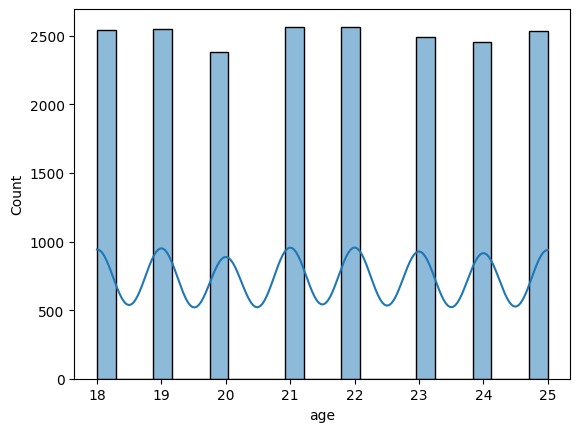

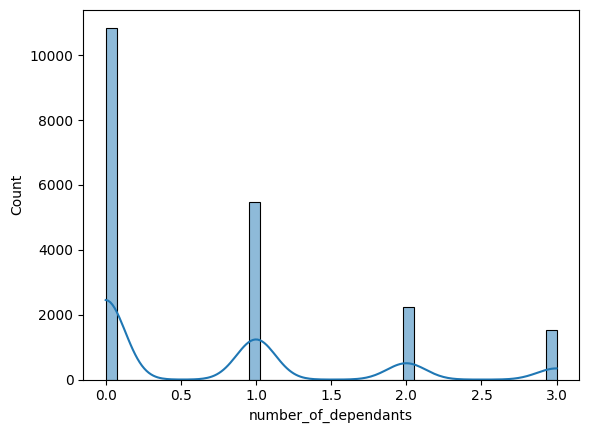

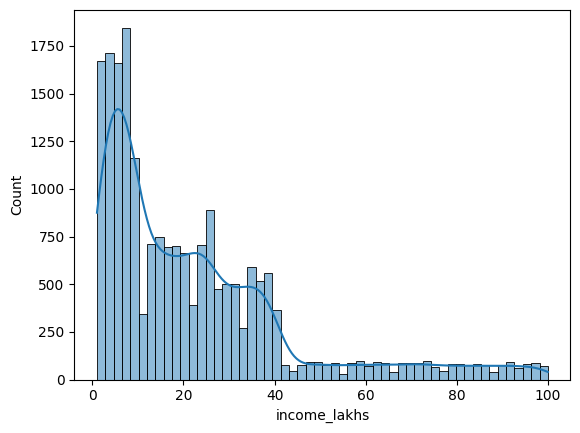

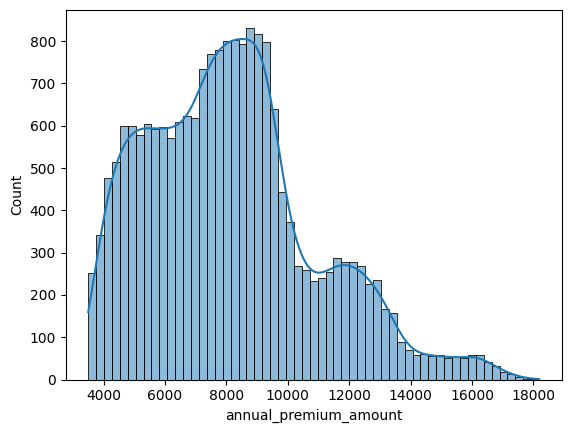

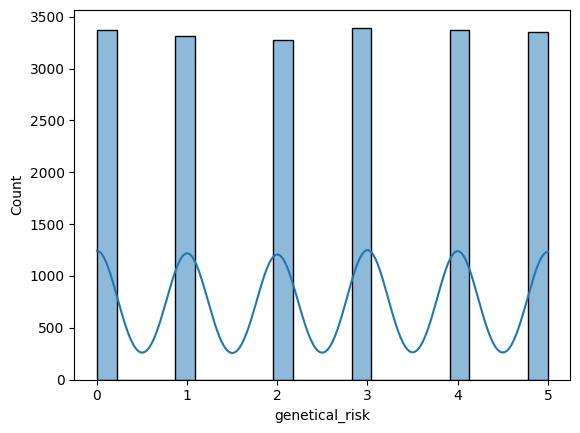

In [84]:
for col in numerix_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

In [85]:
categorical_col=df2.drop(['age','number_of_dependants','income_lakhs','annual_premium_amount'],axis='columns').columns.to_list()


In [86]:
for col in categorical_col:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ['Silver' 'Bronze' 'Gold']
genetical_risk [4 3 2 1 0 5]


In [87]:
df2.replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',},inplace=True)

In [88]:
for col in categorical_col:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ['Regular' 'No Smoking' 'Occasional']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ['Silver' 'Bronze' 'Gold']
genetical_risk [4 3 2 1 0 5]


In [89]:
df2['gender'].value_counts(normalize=True)

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

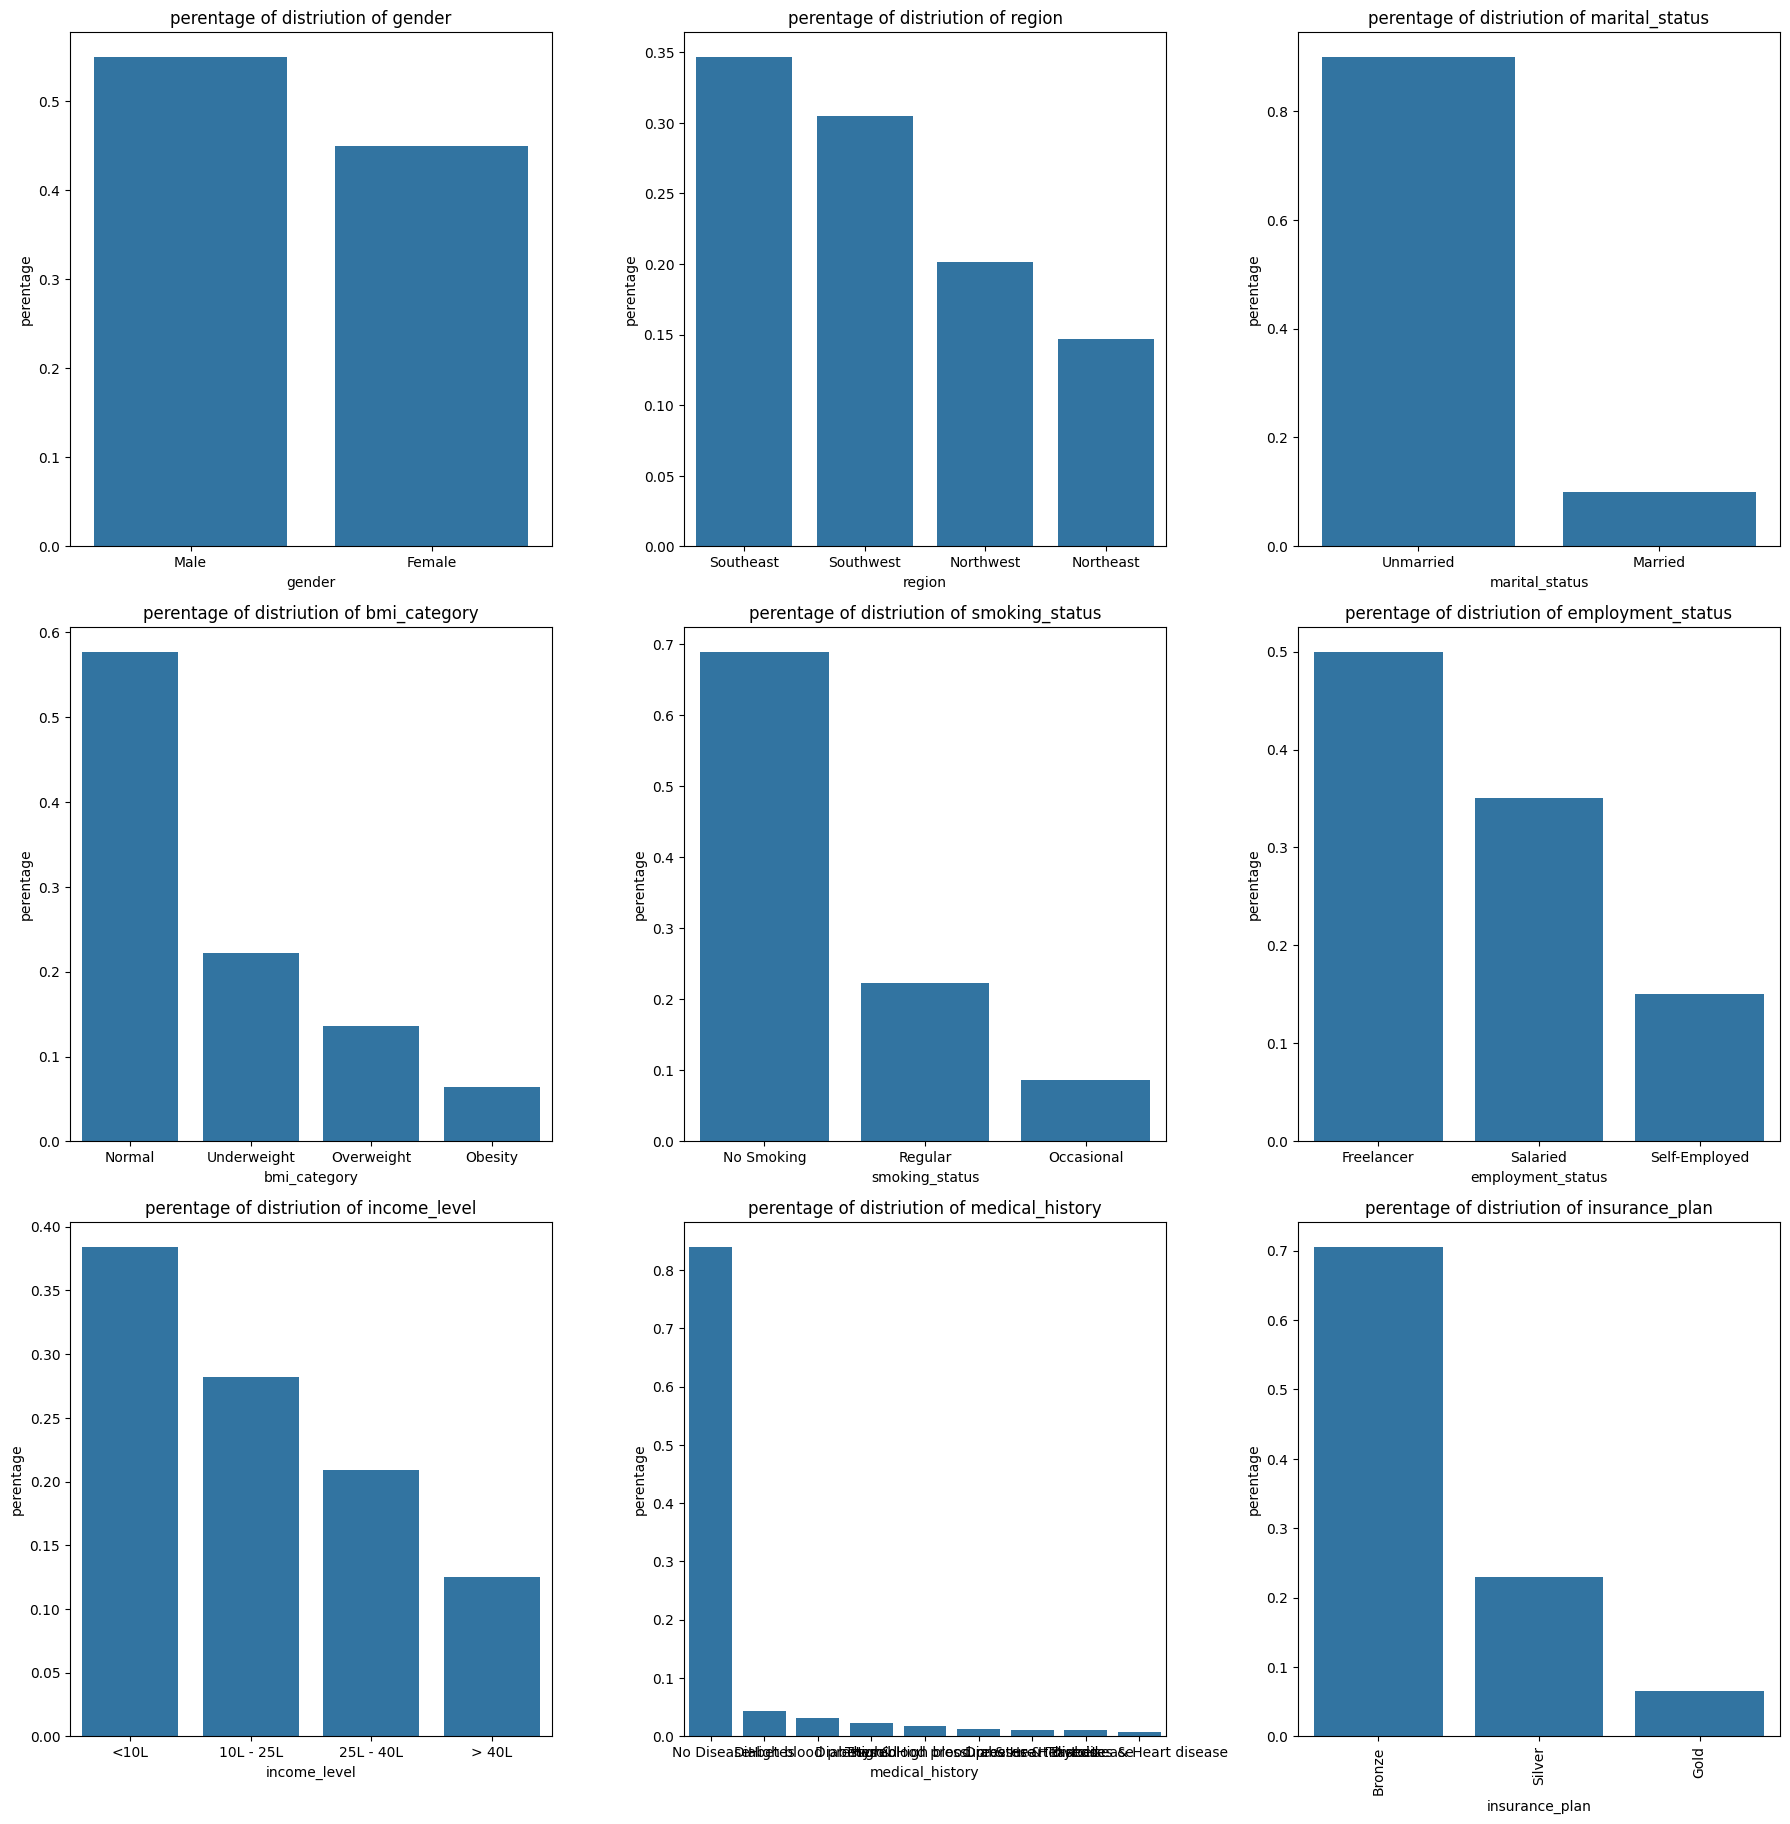

In [90]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
ax=axes.flatten()
for col,ax in zip(categorical_col,ax):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'perentage of distriution of {col}')
    
    ax.set_ylabel('perentage')
    ax.set_xlabel(col)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='income_level'>

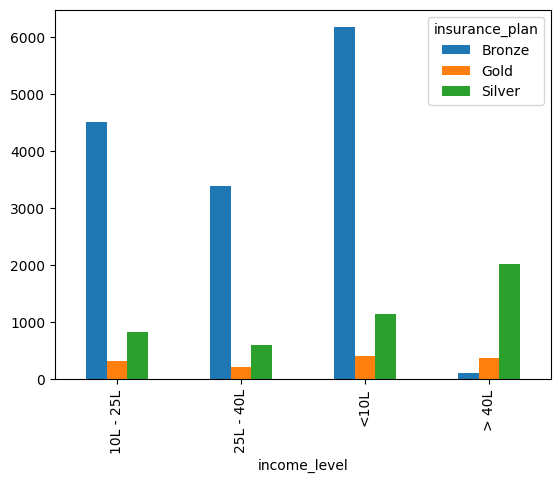

In [91]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab.plot(kind='bar')

In [92]:
df2.medical_history.unique()
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
10687,21,Male,Southwest,Unmarried,0,Overweight,Regular,Salaried,25L - 40L,37,No Disease,Silver,8782,0
7749,25,Male,Southeast,Unmarried,1,Normal,No Smoking,Salaried,25L - 40L,25,No Disease,Bronze,5975,2
19506,23,Male,Southwest,Unmarried,1,Overweight,Regular,Salaried,10L - 25L,19,Diabetes,Bronze,6025,1
11003,24,Male,Northeast,Married,3,Overweight,Occasional,Freelancer,<10L,2,No Disease,Bronze,7934,3
13965,19,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,> 40L,97,No Disease,Silver,11568,4


In [93]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None


In [94]:
df2.fillna({'disease1':'none'},inplace=True)
df2.fillna({'disease2':'none'},inplace=True)
# df2['disease1'].replace('diabetes ','diabetes',inplace=True)
df2['total_risk_score']=0
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [95]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [96]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [97]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [98]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [99]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'> 40L':4, '25L - 40L':3})
df2.income_level.unique()

array([4, 1, 2, 3])

In [100]:
nominal_columns=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [101]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


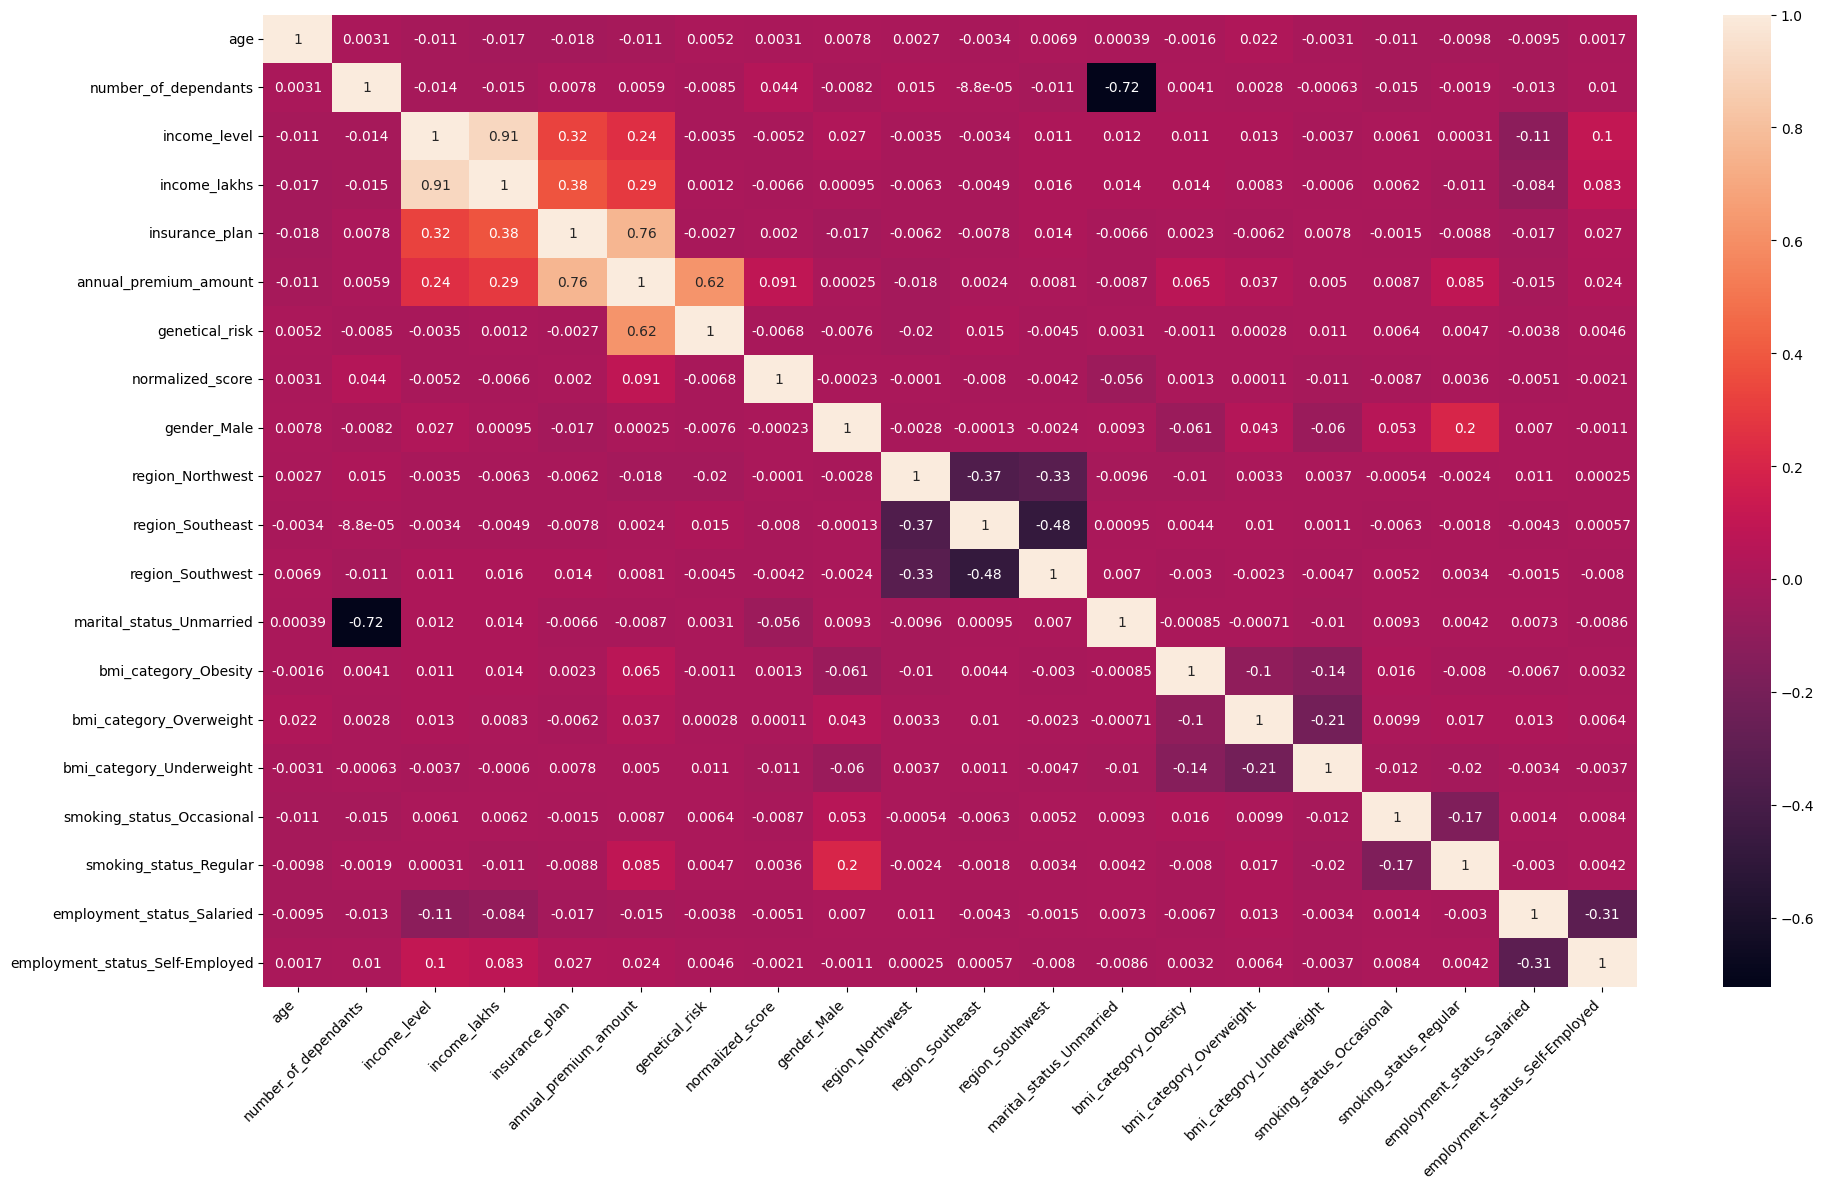

In [102]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [103]:
from sklearn.preprocessing import MinMaxScaler
X=df4.drop('annual_premium_amount',axis="columns")
y=df4['annual_premium_amount']
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

                   
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [105]:
X_reduecd=X.drop('income_level',axis="columns")
X_reduecd.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [106]:
X_reduecd.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

#### MODEL TRAINING

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X_reduecd,y,test_size=0.3,random_state=10)
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score=model_lr.score(X_train,y_train)
train_score,test_score

(0.988297900194864, 0.9887263253056615)

In [108]:
model_lr.intercept_

3978.823528438259

In [109]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

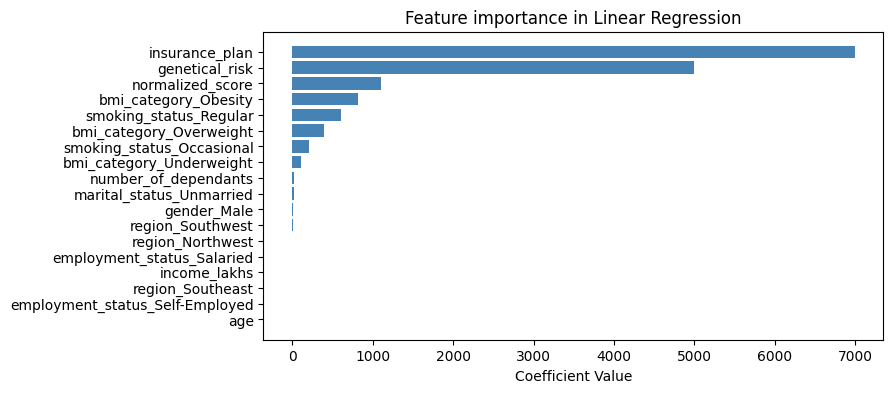

In [110]:
feature_importances=model_lr.coef_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [111]:
model_r=Ridge()
model_r.fit(X_train,y_train)
test_score=model_r.score(X_test,y_test)
train_score=model_r.score(X_train,y_train)
train_score,test_score

(0.9882972960153418, 0.9887275909694276)

In [112]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score=model_xgb.score(X_train,y_train)
train_score,test_score

(0.9925054907798767, 0.987729549407959)

In [113]:
y_pred=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)
rmse_xgb

305.4712622520847

In [114]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
random_search.fit(X_train,y_train)
random_search.best_score_

0.9885703126589457

In [115]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2}

In [116]:
best_model=random_search.best_estimator_


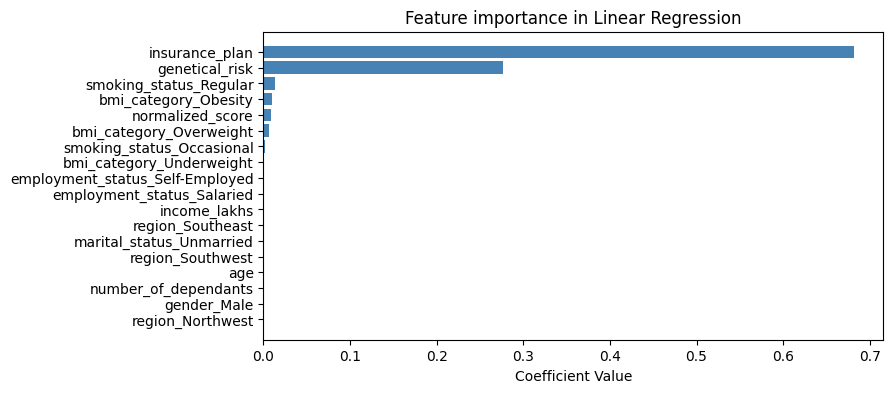

In [117]:
feature_importances=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [118]:
best_model=model_lr

### ERROR ANLYSIS

In [119]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct = residuals*100/y_test
results_df=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':residuals,'diff_pct':residuals_pct})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


<Axes: xlabel='diff_pct', ylabel='Count'>

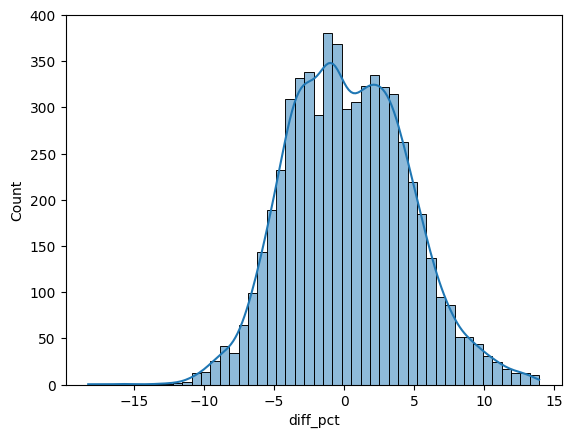

In [120]:
sns.histplot(results_df['diff_pct'],kde=True)

In [121]:
error_threshold=10
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>error_threshold]
extreme_resutls_df

,actual,predicted,diff,diff_pct
12669,3985,4394.013230,409.013230,10.263820
2918,4517,5001.927338,484.927338,10.735606
17084,3562,3995.394401,433.394401,12.167165
7181,3630,4005.052340,375.052340,10.332020
12285,3532,3998.012625,466.012625,13.194015
...,...,...,...,...
1986,4633,5098.340369,465.340369,10.044040
8008,4902,5402.149195,500.149195,10.202962
9714,3624,4001.680590,377.680590,10.421650
7357,8608,7642.535233,-965.464767,-11.215901


In [122]:
extreme_error_pct=extreme_resutls_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.140723531364089

In [123]:
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)
extreme_resutls_df

,actual,predicted,diff,diff_pct


In [124]:
extreme_error_df=X_test.loc[extreme_resutls_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


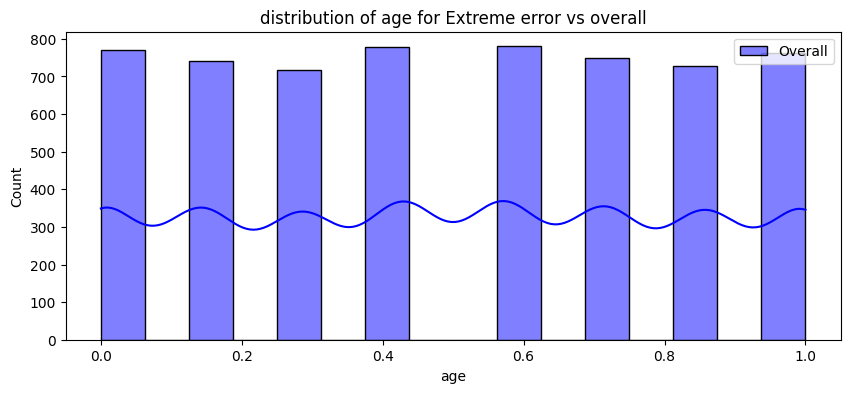

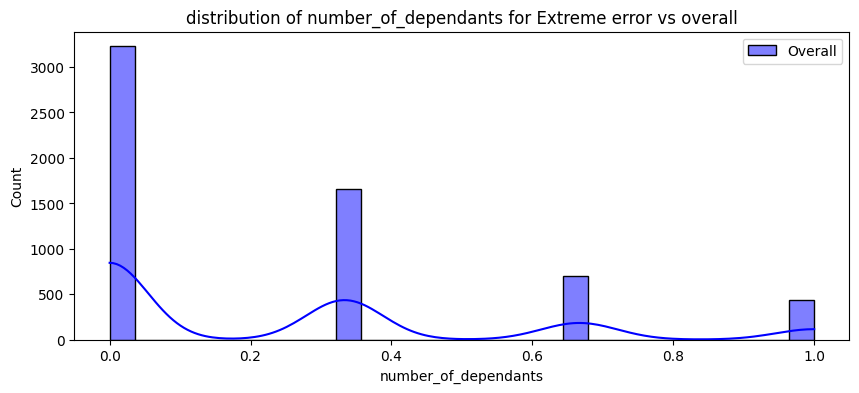

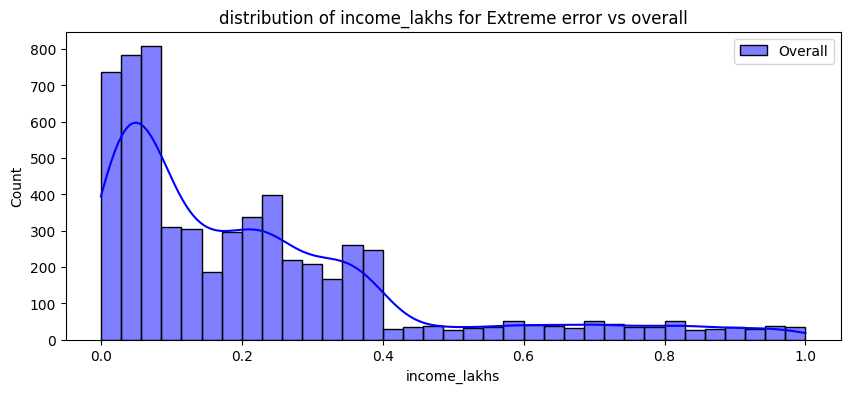

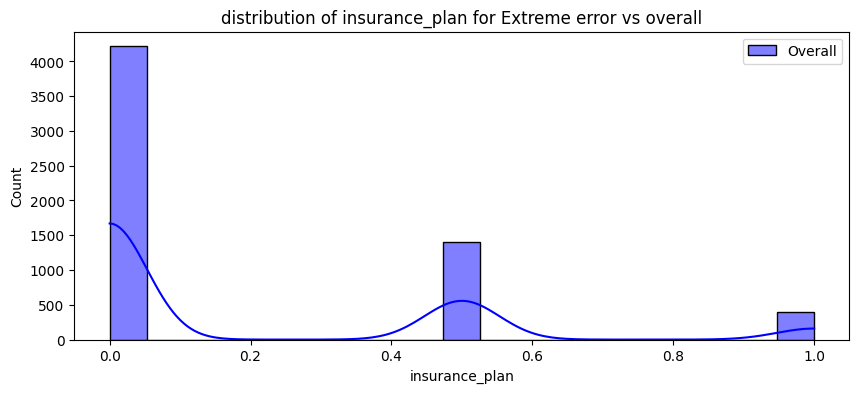

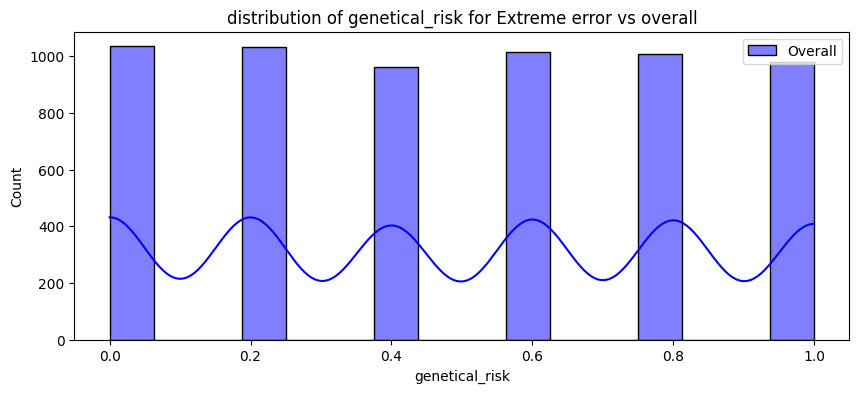

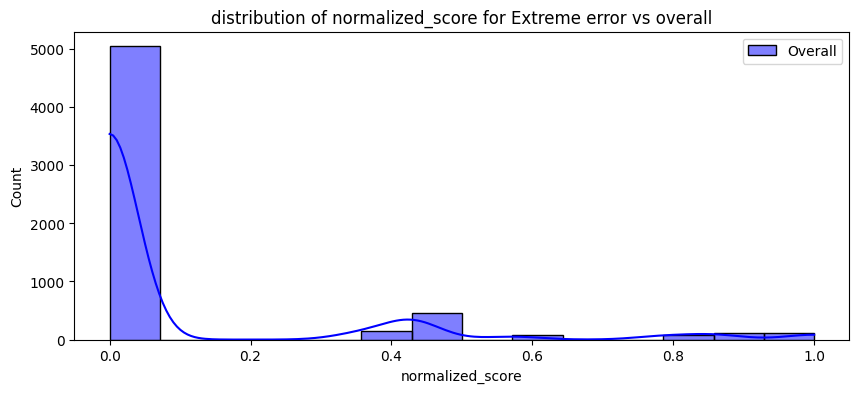

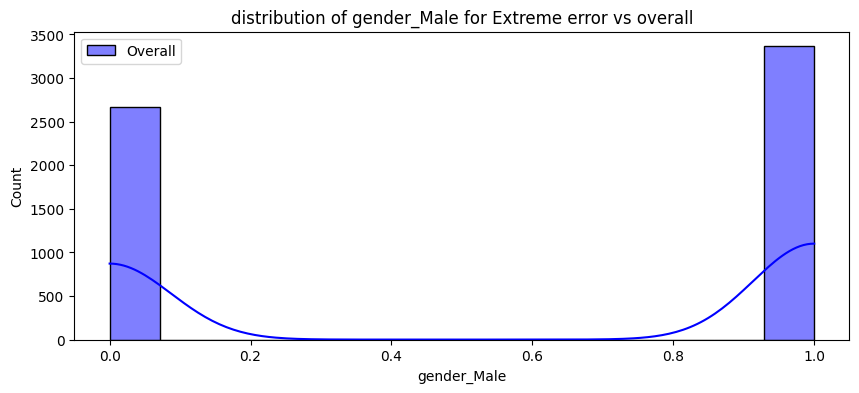

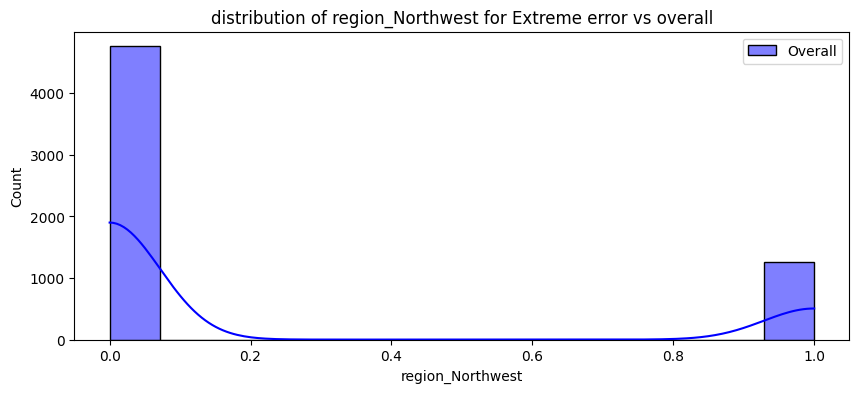

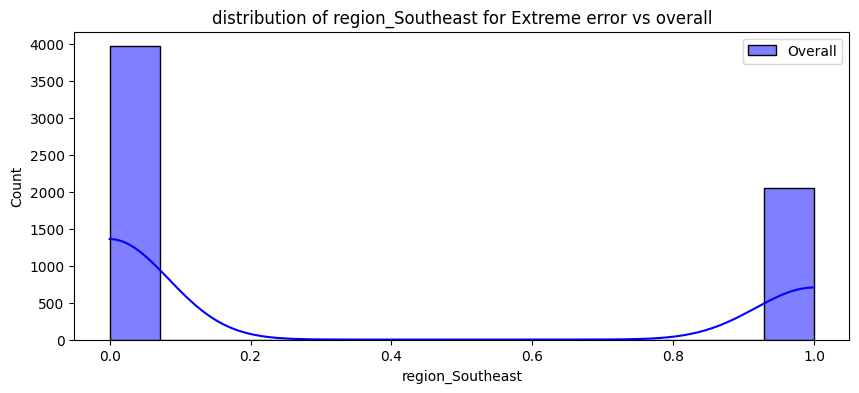

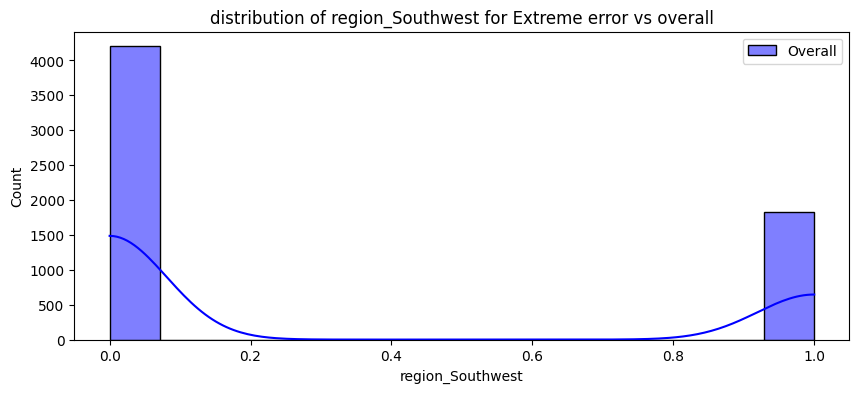

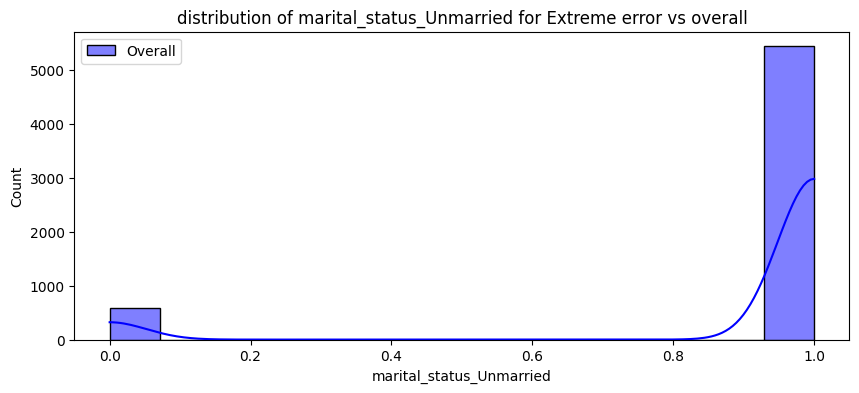

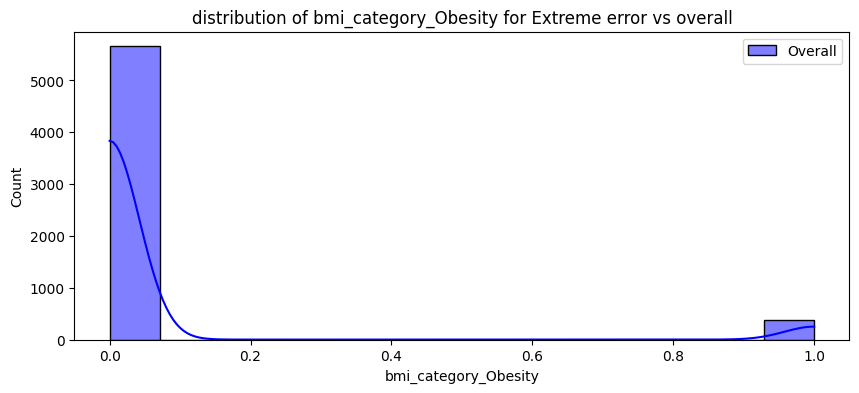

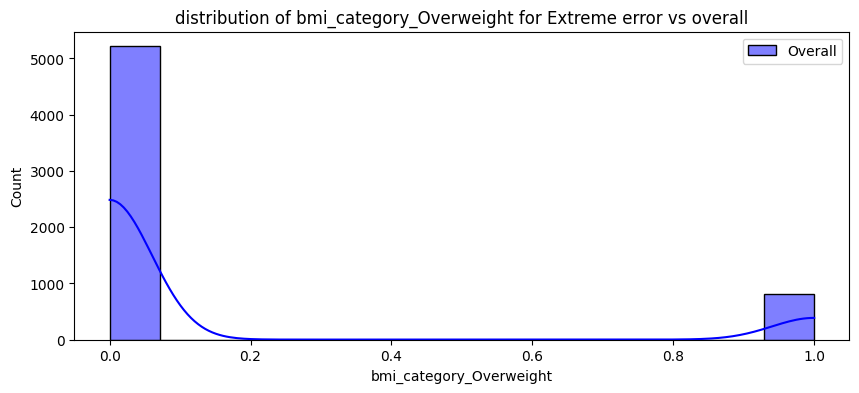

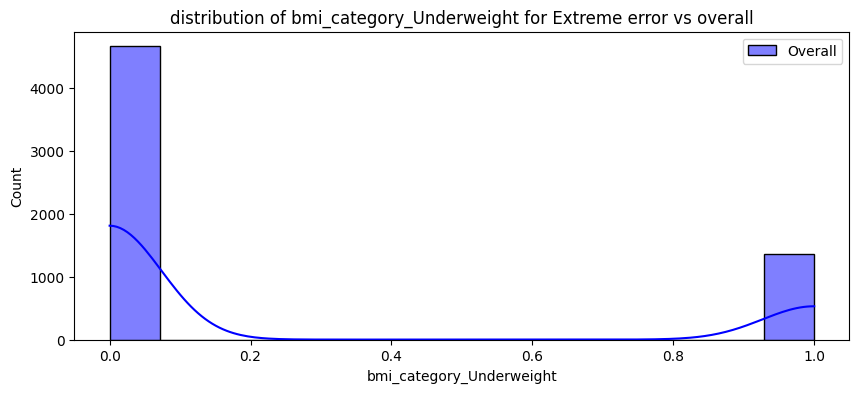

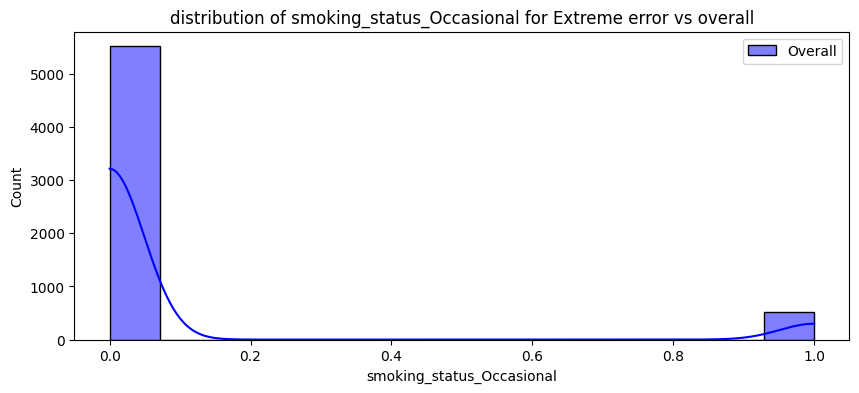

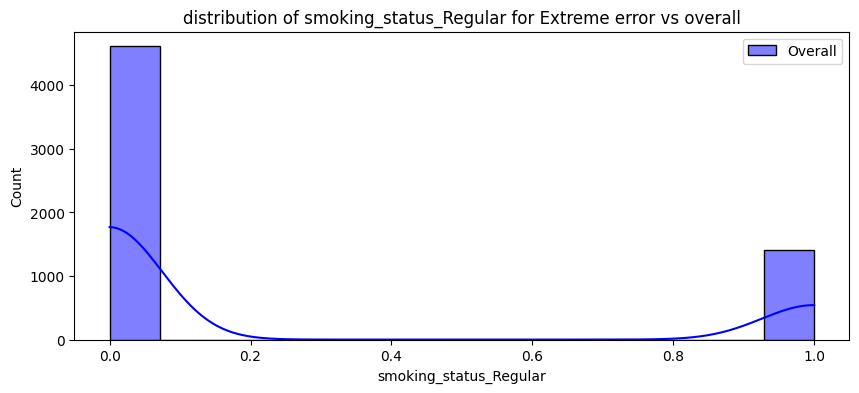

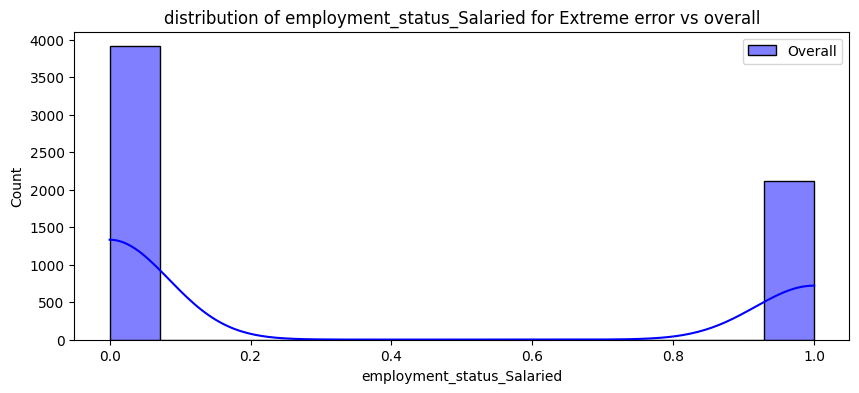

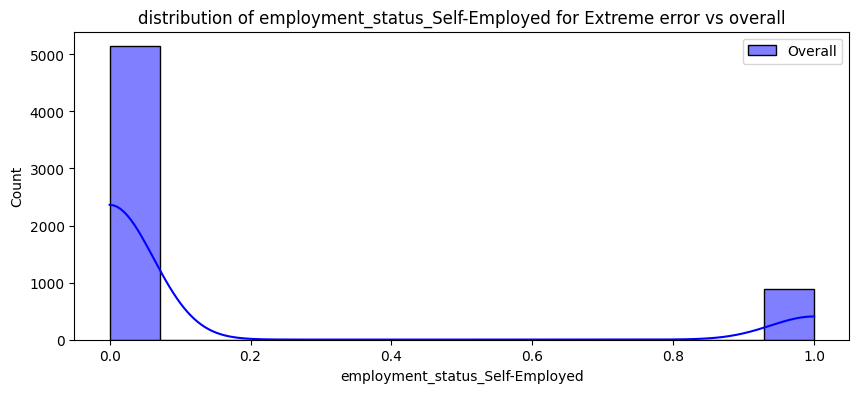

In [125]:
for feature in X_test.columns:
        plt.figure(figsize=(10,4))
        
        sns.histplot(X_test[feature],label="Overall",color='blue',alpha=0.5,kde=True)
        sns.histplot(extreme_error_df[feature],label="Extreme Errors",color='red',kde=True)
        plt.title(f'distribution of {feature} for Extreme error vs overall')
        plt.legend()
        plt.show()

### Export The Model

In [126]:
from joblib import dump
dump(best_model,"artifacts/model_young.joblib")
scaler_with_cols={'scaler':scaler,'cols_to_scale':cols_to_scale}
dump(scaler_with_cols,"artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']

In [127]:
extreme_error_df.columns,cols_to_scale

(Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
        'genetical_risk', 'normalized_score', 'gender_Male', 'region_Northwest',
        'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
        'bmi_category_Obesity', 'bmi_category_Overweight',
        'bmi_category_Underweight', 'smoking_status_Occasional',
        'smoking_status_Regular', 'employment_status_Salaried',
        'employment_status_Self-Employed'],
       dtype='object'),
 ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk'])

In [128]:
extreme_error_df['income_level']=-1
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [ ]:
sns.histplot(df_reversed.age,kde=True)

In [ ]:
df_reversed.describe()